### Goal:

Using the previously created `44v45tweets.csv`, we'll train (at least) two ML models to predict whether the text of a tweet is directed at 44, 45, or both.

In [1]:
#! pip install --user pandas_ml
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

#import nltk
#nltk.download('stopwords')

In [2]:
stop_words = stopwords.words('english')
stop_words += ['barackobama', 'realdonaldtrump']
stop_words[-5:]

["won't", 'wouldn', "wouldn't", 'barackobama', 'realdonaldtrump']

In [3]:
df = pd.read_csv('44v45tweets.csv', index_col = 0)
df.head()

,id_str,at_44,at_45,full_text,pruned_text
0,1117206445756428295,True,True,@joncoopertweets @BarackObama @realDonaldTrump...,@joncoopertweets 1/2 of the 59 millions are ...
1,1117206412101332993,True,False,"@davidcicilline @BarackObama Hell, I miss ALL ...","@davidcicilline hell, i miss all of them!"
2,1117206404228624384,True,False,@SylviaKAlston @BarackObama I totally agree! #...,@sylviakalston i totally agree! #44 “forever ...
3,1117206361471844358,True,True,@ballweg_matt @Elaine_Greek @EricVonHaden1 @Br...,@ballweg_matt @elaine_greek @ericvonhaden1 @br...
4,1117206361316708353,True,True,@joncoopertweets @BarackObama @realDonaldTrump...,@joncoopertweets do we really need an explan...


In [4]:
conditions = [
    (df['at_44']) & (df['at_45']),
    (df['at_44'] == False) & (df['at_45']),
    (df['at_44']) & (df['at_45'] == False)
]
choices = ['both', 'trump', 'obama']
df['label'] = np.select(conditions, choices)
df.head()

,id_str,at_44,at_45,full_text,pruned_text,label
0,1117206445756428295,True,True,@joncoopertweets @BarackObama @realDonaldTrump...,@joncoopertweets 1/2 of the 59 millions are ...,both
1,1117206412101332993,True,False,"@davidcicilline @BarackObama Hell, I miss ALL ...","@davidcicilline hell, i miss all of them!",obama
2,1117206404228624384,True,False,@SylviaKAlston @BarackObama I totally agree! #...,@sylviakalston i totally agree! #44 “forever ...,obama
3,1117206361471844358,True,True,@ballweg_matt @Elaine_Greek @EricVonHaden1 @Br...,@ballweg_matt @elaine_greek @ericvonhaden1 @br...,both
4,1117206361316708353,True,True,@joncoopertweets @BarackObama @realDonaldTrump...,@joncoopertweets do we really need an explan...,both


In [5]:
data = df[['label', 'full_text']].copy()
data.head()

,label,full_text
0,both,@joncoopertweets @BarackObama @realDonaldTrump...
1,obama,"@davidcicilline @BarackObama Hell, I miss ALL ..."
2,obama,@SylviaKAlston @BarackObama I totally agree! #...
3,both,@ballweg_matt @Elaine_Greek @EricVonHaden1 @Br...
4,both,@joncoopertweets @BarackObama @realDonaldTrump...


In [6]:
# preparing the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = stop_words)
corpus = data['full_text'].iloc[:].tolist()
X = vectorizer.fit_transform(corpus)
X.shape

(2601, 8714)

In [7]:
Y = data['label']
Y.head()

0     both
1    obama
2    obama
3     both
4     both
Name: label, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xTrain, yTrain)

In [10]:
predicted = clf.predict(xTest)

In [11]:
np.mean(predicted == yTest)

0.8637236084452975

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest, predicted)

array([[ 27,   1,  17],
       [  3,  80,  17],
       [ 16,  17, 343]])

In [16]:
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(yTest, predicted)
cm

Predicted  both  obama  trump  __all__
Actual                                
both          5     11     29       45
obama         6     25     69      100
trump        36     54    286      376
__all__      47     90    384      521

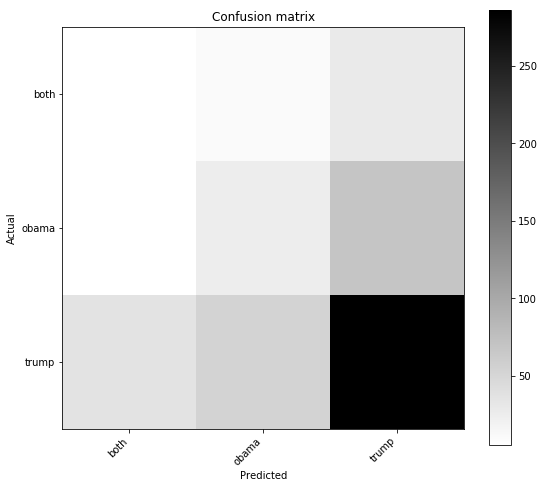

In [17]:
cm.plot()